<a href="https://colab.research.google.com/github/r0zbot/IoTensor/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto IoTensor - Year Prediction**
#### **Membros**
- Bruno Carneiro da Cunha NUSP: 10376388
- Daniel de Souza Martinez NUSP: 10297709
- Eduardo do Nascimento Evaristo 10267070
- Nathalia Orlandi Borin NUSP: 10297884
- Thiago Cunha Ferreira NUSP: 10297605

#### **Dados**
O conjunto de dados possui 515.345 instâncias, cada entrada corresponde a uma canção popular diferente lançada entre os anos 1922 e 2011. Para cada canção, temos um vetor de 91 atributos: o ano de lançamento, 12 valores de média de timbre, e 78 valores de covariância de timbre.

O objetivo será prever o ano de lançamento de uma canção, dado os 90 atributos de timbre descritos acima. Usaremos 463.715 exemplos para o conjunto de treino, e os últimos 51.630 exemplos para o conjunto de testes. Nenhum artista possui uma canção em ambos os bancos de dados, assim teremos uma maior independência entre os conjuntos.

_Obs: Para executar este notebook, é necessário tornar o dataset usado acessível através do Google Drive. Para isso, importe a pasta do Drive abaixo na sua conta (adicionando a pasta compartilhada como atalho para seu Drive). O código irá acessar seu diretório do Google Drive (pedindo antes uma autenticação) e irá procurar por uma pasta similar ao linkado abaixo_

#### **Links**
* [Dataset](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD)
* [Pasta do drive](https://drive.google.com/drive/folders/1LY8d-l7Fions1NG7WBAJPEQvLDmt-vOi?usp=sharing)
* [Repositório](https://github.com/r0zbot/IoTensor)

## **Preparação dos dados**

In [ ]:
# Import das bibliotecas
import random
from pprint import pprint
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras import backend as K
from sklearn.preprocessing import StandardScaler 

# Import do dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Seleção de Features**
Inicialmente, testamos alguns modelos utilizando todas as 90 features que dispomos, porém os resultados foram insatisfatórios, com o erro na casa dos bilhões.

Buscando reduzir o número de features para tornar o processo de treinamento mais efetivo, aplicamos um **PCA - Principal Component Analysis**, algoritmo que identifica as features mais independentes entre si, ou seja, que mais afetam o valor esperado. 

Dessa forma, escolhemos utilizar apenas as features que mais explicam a variância dos atributos. Neste caso, escolhemos manter 55 componentes para o processo de treinamento, que explicam 90% da variância dos dados.

Também aplicamos a padronização das variáveis, deixando com média 0 e desvio padrão 1 para todas. A padronização tenta igualar a relevância numérica das variáveis e facilita no processo de treinamento, evitando números grandes ou pequenos demais.

In [ ]:
# Leitura
data = pd.read_csv('drive/My Drive/IoTensor/YearPredictionMSD.txt', sep=',', header=None)
# Standardization
x_std = StandardScaler().fit_transform(data.iloc[:,1:])
print(np.mean(x_std))
print(np.std(x_std))
# Principal Component Analysis
pca = PCA(.90)
pca_data = pca.fit_transform(x_std)
print(pca_data.shape)
# Separação do conjunto de dados
x_train = pca_data[:463715]
x_test = pca_data[463716:]
y_train = np.array(data.iloc[:463715, 0])
y_test =  np.array(data.iloc[463716:, 0])

print('x_train:')
print(f'dtype {x_train.dtype} \nshape {x_train.shape} \nmin value {np.min(x_train)} \nmax value {np.max(x_train)} \n')
print('y_train:')
print(f'dtype {y_train.dtype} \nshape {y_train.shape} \nmin value {np.min(y_train)} \nmax value {np.max(y_train)} \n')
print('x_test:')
print(f'dtype {x_test.dtype} \nshape {x_test.shape} \nmin value {np.min(x_test)} \nmax value {np.max(x_test)} \n')
print('y_test:')
print(f'dtype {y_test.dtype} \nshape {y_test.shape} \nmin value {np.min(y_test)} \nmax value {np.max(y_test)} \n')

3.04555191978422e-19
0.9999999999999999
(515345, 55)
x_train:
dtype float64 
shape (463715, 55) 
min value -42.44713027766563 
max value 85.93385217029085 

y_train:
dtype int64 
shape (463715,) 
min value 1922 
max value 2011 

x_test:
dtype float64 
shape (51629, 55) 
min value -39.8742350199825 
max value 54.35292721762078 

y_test:
dtype int64 
shape (51629,) 
min value 1927 
max value 2010 



In [ ]:
# Imprime um exemplo dos dados
rand = random.randrange(463715)
print(f'x_train[{rand}]')
pprint(x_train[random.randrange(463715)])

x_train[290315]
array([ 1.80928071e+00, -3.67560973e-01,  2.14416747e+00, -1.58248979e+00,
        6.05320250e-01,  2.52264397e+00,  1.13050402e+00, -6.28697722e-01,
       -1.00106822e+00, -1.32283569e+00,  3.73792353e-01, -4.35802225e-01,
       -1.74934575e+00, -8.92359952e-01, -2.95188574e-01, -9.02203331e-01,
        1.86474344e+00,  5.65903029e-01,  9.95291071e-01, -1.42995040e-01,
        3.98967539e-01,  6.58618899e-01,  1.20976243e-03, -4.68200749e-01,
       -1.41429686e+00,  8.17665711e-01,  4.30906068e-02,  9.79802455e-01,
       -9.33260762e-01,  2.57890266e-01,  4.13016151e-01,  6.23333608e-01,
       -6.41109537e-01, -1.51556743e-01,  8.23042603e-01, -6.30373245e-02,
       -1.51316673e+00,  1.36028533e-01,  1.11251830e+00,  1.00407877e+00,
        1.67809664e-01, -1.73339030e-02, -1.32734353e-01,  7.94566998e-01,
        9.93359791e-01,  3.92541059e-01,  4.85330007e-01, -3.69544697e-01,
       -5.80414887e-01,  5.69569785e-01, -2.80924390e-01, -1.11363283e-01,
        3

## **Treinamento e validação**
Escolhemos um modelo de rede neural sequencial: isto é, os inputs caminham sequencialmente pelas camadas da rede, sendo que nenhuma saída de uma camada se conecte na entrada de uma camada anterior.

Após alguns testes nos parâmetros, chegamos num modelo cujo erro quadrático ficou na ordem de grandeza de $10^{2}$

Nosso modelo final ficou com 4 camadas, com 30, 15, 5 e 1 neurônios, respectivamente.

O modelo foi treinado usando o algoritmo de Adam, uma variação do algoritmo **Stochastic Gradient Descent**, que escolhemos por já termos estudado o **SGD** na matéria de Machine Learning. A função de custo que buscamos otimizar foi o **Erro Quadrático**.

80% dos dados (412276 instâncias) foram usados para **treinamento** e os 20% restantes (103069) usados para **validação**.

In [ ]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense(units=30, input_shape=[55]),
    tf.keras.layers.Dense(units=15),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error',                # error function
              optimizer=tf.keras.optimizers.Adam(0.1))  # como o modelo se atualiza baseado nas amostras e no erro                                          

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, verbose=True)

Epoch 1/20
11593/11593 [==============================] - 23s 2ms/step - loss: 1879.7308 - val_loss: 121.9284
Epoch 2/20
11593/11593 [==============================] - 23s 2ms/step - loss: 5578.9062 - val_loss: 119.2402
Epoch 3/20
11593/11593 [==============================] - 23s 2ms/step - loss: 11446.9863 - val_loss: 116.5502
Epoch 4/20
11593/11593 [==============================] - 22s 2ms/step - loss: 1514.9703 - val_loss: 108.5188
Epoch 5/20
11593/11593 [==============================] - 23s 2ms/step - loss: 3968.1521 - val_loss: 114.5381
Epoch 6/20
11593/11593 [==============================] - 23s 2ms/step - loss: 804.6878 - val_loss: 106.7677
Epoch 7/20
11593/11593 [==============================] - 23s 2ms/step - loss: 1396.8527 - val_loss: 110.4154
Epoch 8/20
11593/11593 [==============================] - 23s 2ms/step - loss: 1317.0703 - val_loss: 127.4711
Epoch 9/20
11593/11593 [==============================] - 23s 2ms/step - loss: 1672.9771 - val_loss: 119.1095
Epoch 10/2

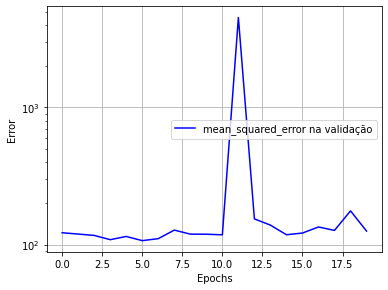

In [ ]:
# Gráfico da evolução do erro com as épocas
plt.subplot(2, 1, 1)
plt.plot(history.history['val_loss'], color='blue', label='mean_squared_error na validação')
plt.subplots_adjust(top=2.0)
plt.legend()
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel("Epochs")
plt.grid()
plt.show()

In [ ]:
# Algumas previsões no conjunto de treinamento
for i in range(3):
    r = random.randrange(463715)
    y = int(model.predict(np.array([np.array(x_train[r])])))
    print(f'x_train[{r}]:\n    y_pred {y}\n    y_true: {y_train[r]}')

x_train[424822]:
    y_pred 2000
    y_true: 1986
x_train[300285]:
    y_pred 2002
    y_true: 2002
x_train[145307]:
    y_pred 2001
    y_true: 2004


## **Avaliação no conjunto de testes**
Nosso erro médio em anos foi de 11 anos, que consideramos de certa forma aceitável pois a faixa de valores é razoavelmente grande (2011-1922 = 89 anos)

Analisamos também que nosso dataset é bastante desbalanceado: mais de 75% dos dados estão entre 1994-2011, que corresponde a 19% dos valores possíveis.

Por fim, plotamos as distribuições dos resultados do modelo para o conjunto de teste e os anos esperados.


In [ ]:
# Erro médio no conjunto de testes
import math
loss = model.evaluate(x_test, y_test)
print(f'Erro médio: {loss}\nErro médio em anos: {int(math.sqrt(loss))}')

1614/1614 [==============================] - 2s 1ms/step - loss: 123.0871
Erro médio: 123.08705139160156
Erro médio em anos: 11


In [ ]:
# Distribuição do conjunto de treinamento
pd.DataFrame(y_train).describe()

,0
count,463715.000000
mean,1998.386095
std,10.939767
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2011.000000


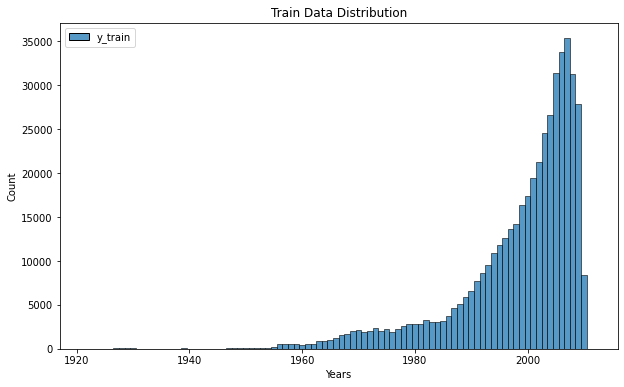

In [ ]:
# Plot da distribuição no conjunto de treinamento
import seaborn as sns
train_fig = plt.figure(figsize=(10, 6))
train_ax = train_fig.add_subplot(title='Train Data Distribution', xlabel='Years', ylabel='Count')
sns.histplot({'y_train':y_train}, discrete=True, ax=train_ax)

In [ ]:
# Roda o modelo para todos no conjunto de teste
y_pred = model.predict(x_test)

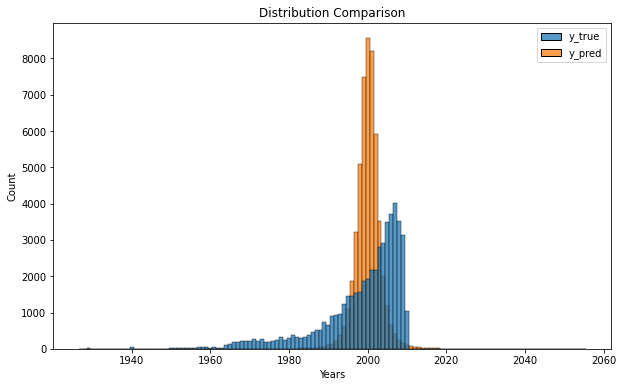

In [ ]:
# Comparação no conjunto de testes
test_fig = plt.figure(figsize=(10, 6))
test_ax = test_fig.add_subplot(title='Distribution Comparison', xlabel='Years', ylabel='Count')
sns.histplot({'y_true':y_test, 'y_pred':y_pred[:,0]}, discrete=True, ax=test_ax)

# **Referências**

- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science